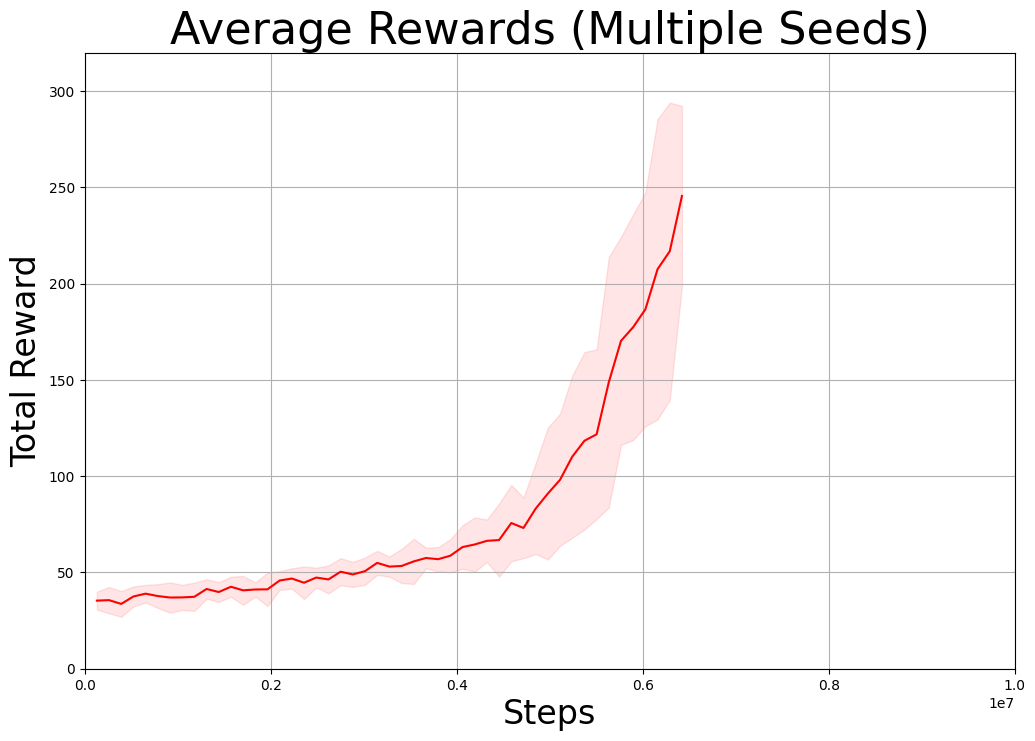

{'id': <visualiser.core.ExperimentVisualise object at 0x00000218F1375580>, 'color': 'r', 'show': True, 'label': 'offline_td3_p4_low_pi_lr'}


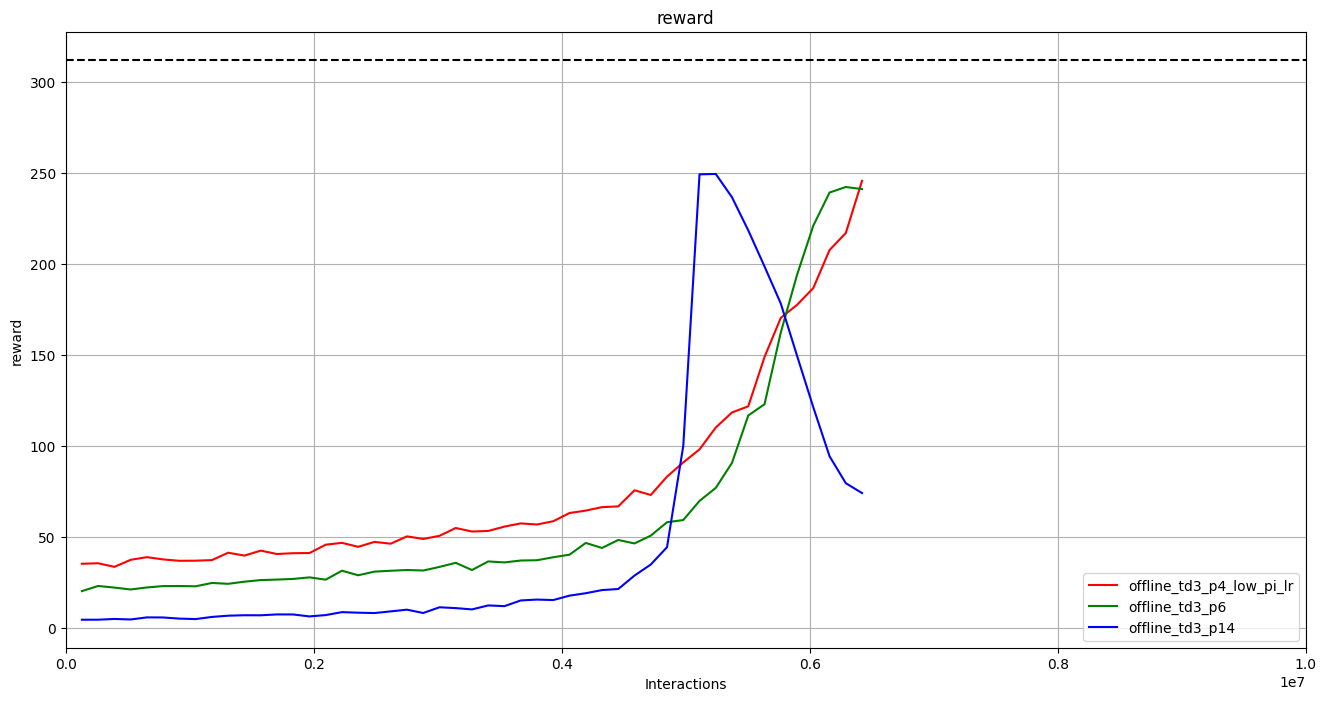

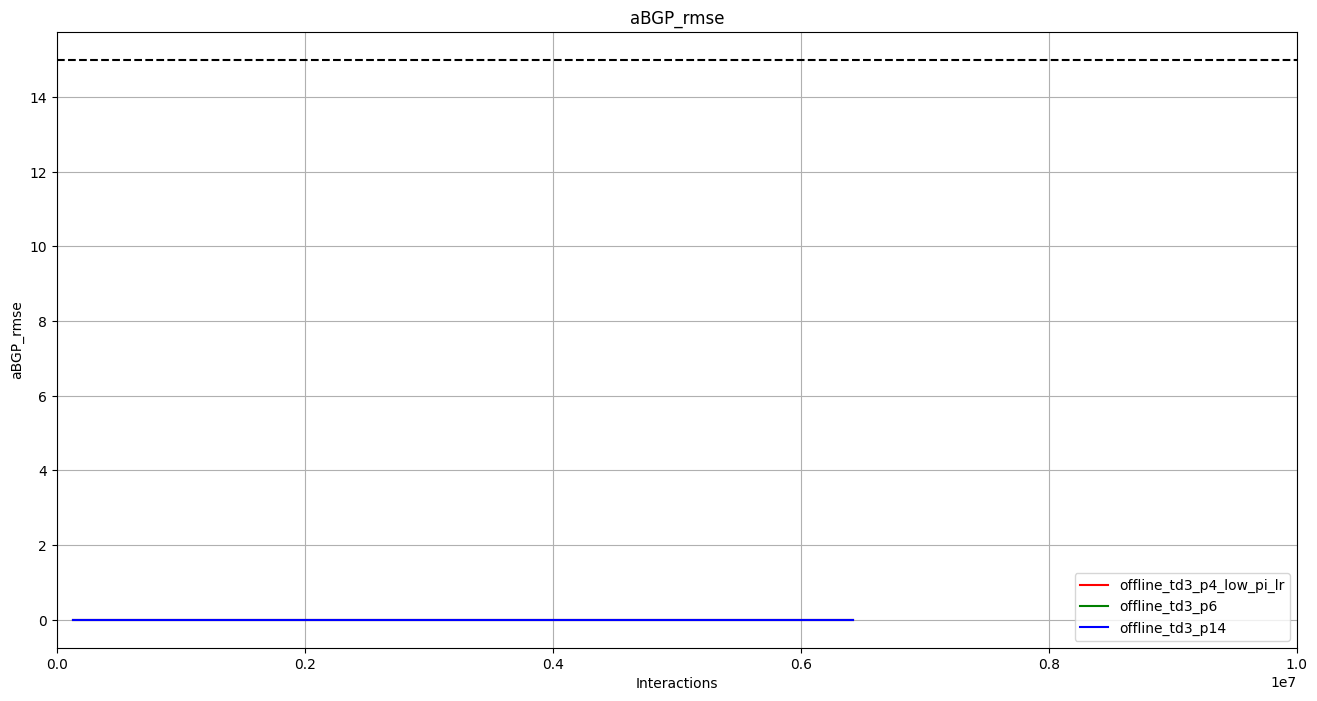

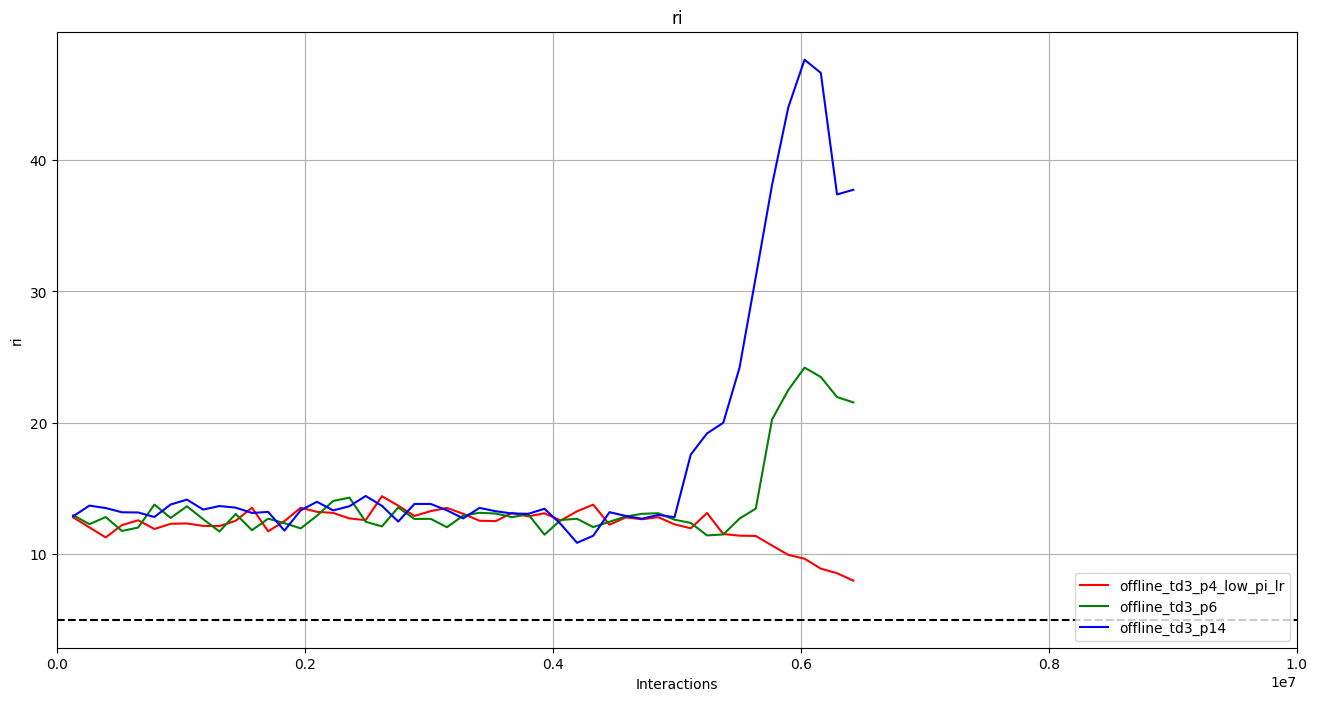

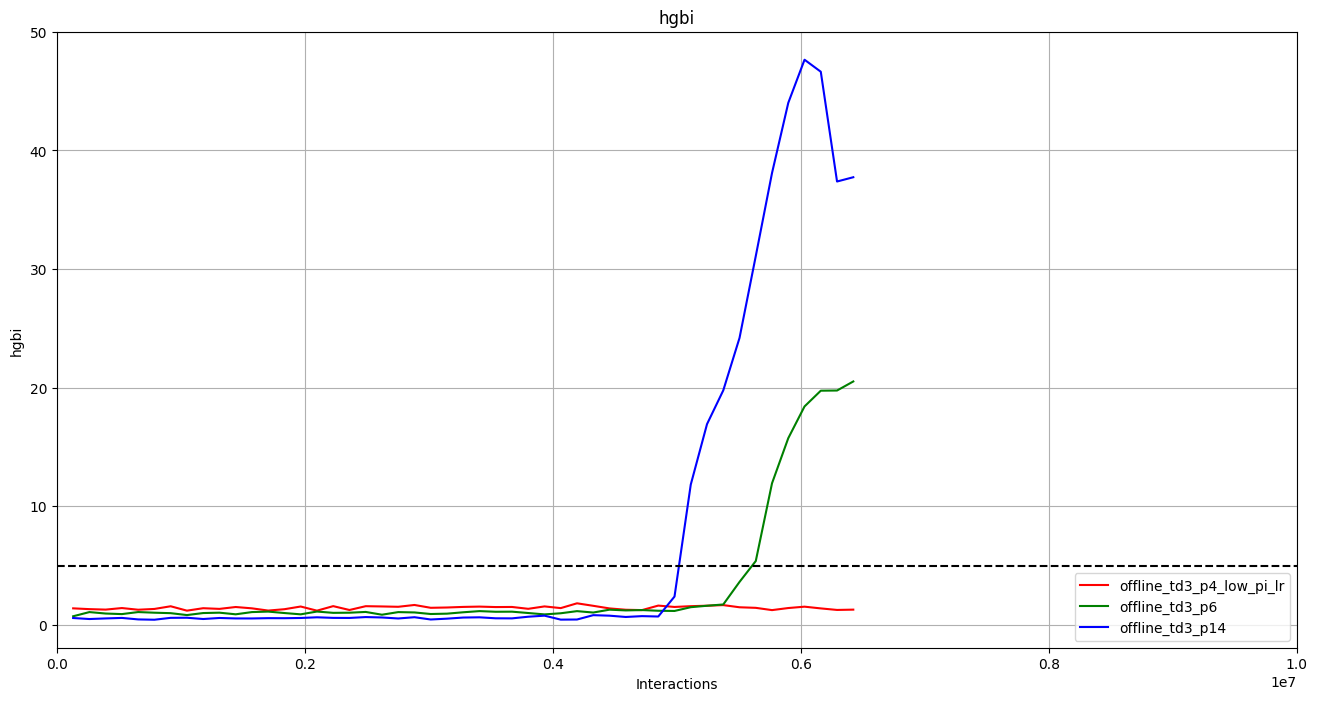

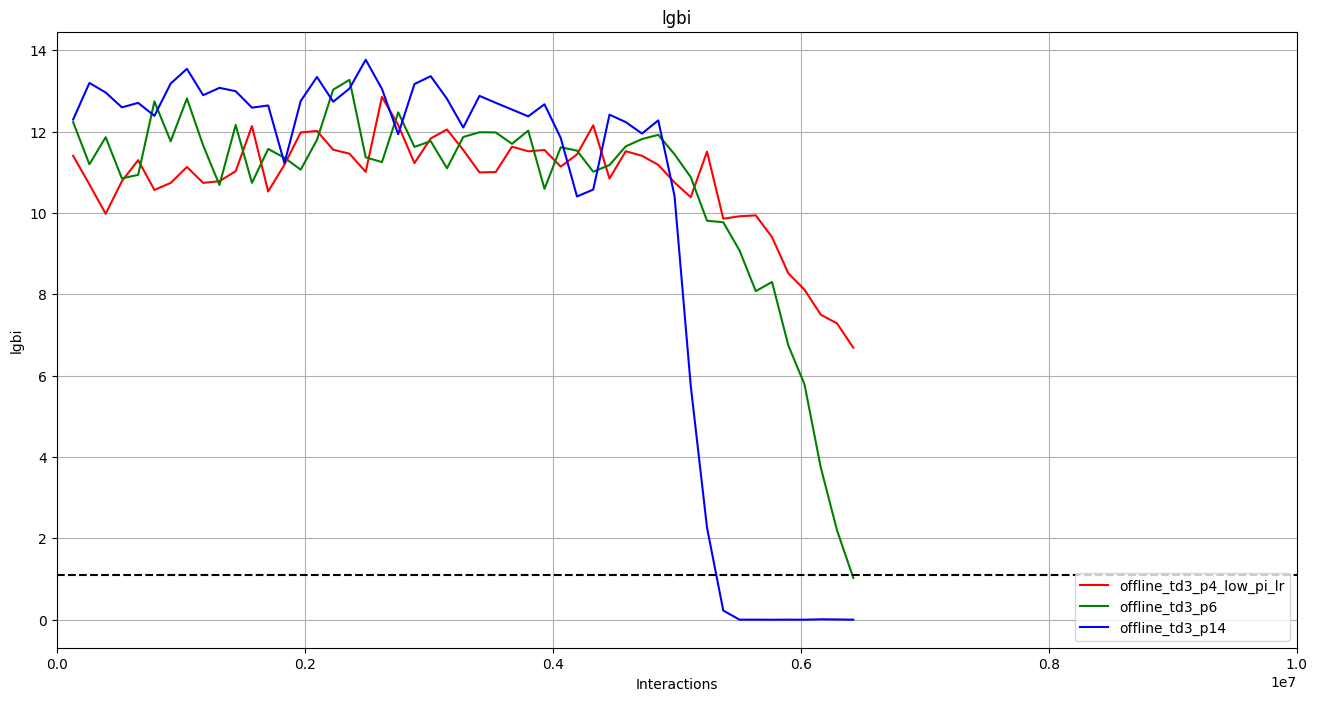

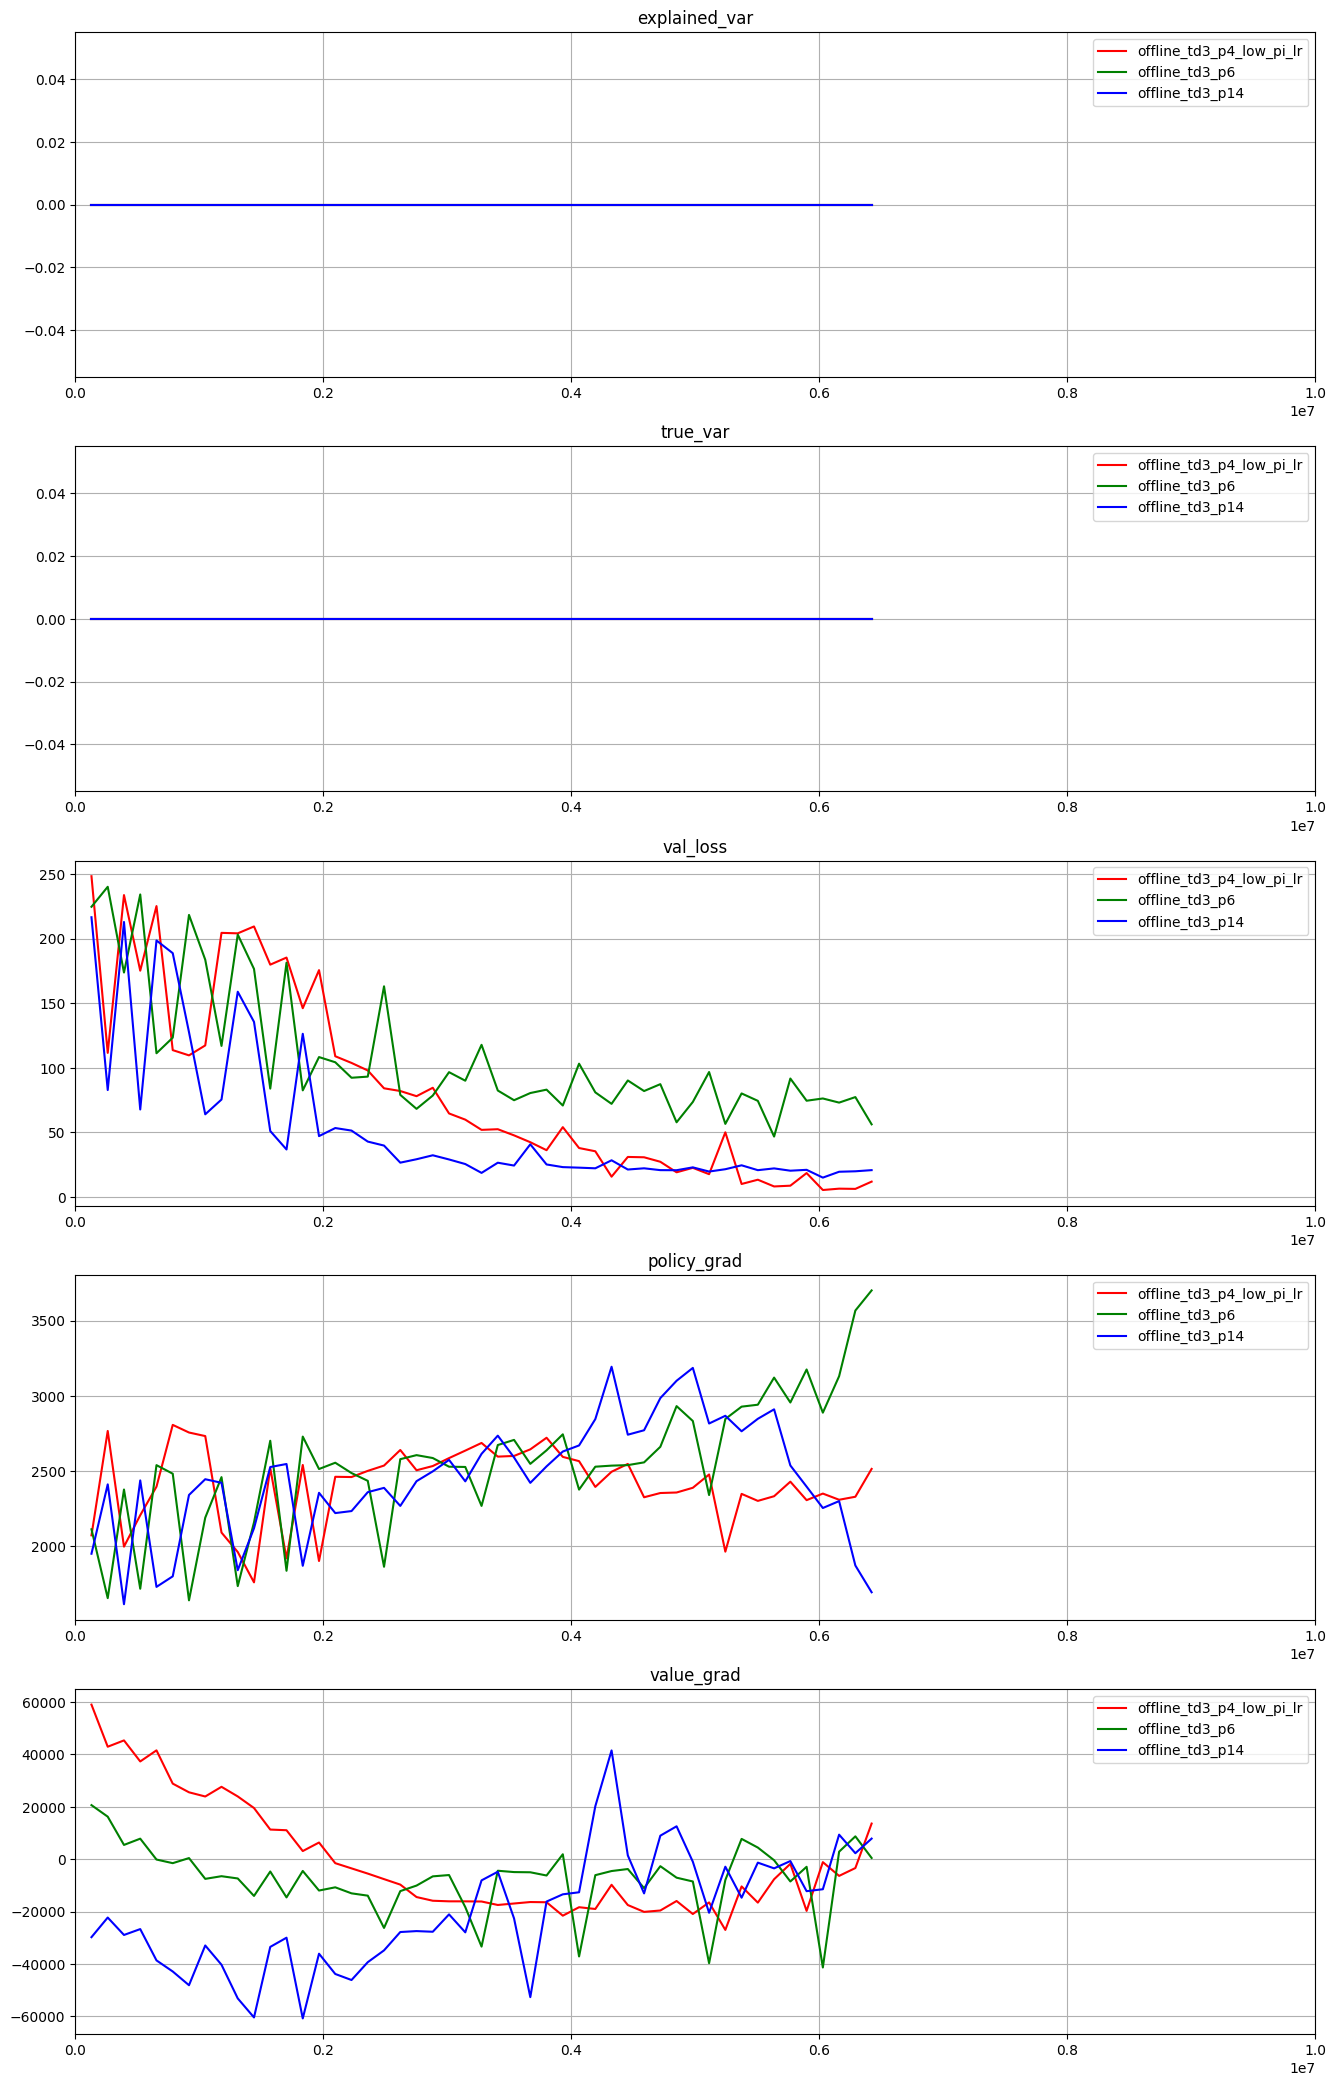

In [2]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = config('MAIN_PATH')
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

# EXP_NAME = 'offline_td3_debug' offline_td3_clinical
EXP_NAME = 'offline_td3_p4_low_pi_lr' 
#  # offline_td3_higher_alpha # #offline_td3_higher_alpha_3
EXP_NAME_2 = "offline_td3_p6"
EXP_NAME_3 = "offline_td3_p14"


# EXP_NAME = 'offline_td3_less_networks_adlscnt0'
# EXP_NAME_2 = 'offline_td3_less_networks_adlscnt4'
# EXP_NAME_3 = 'offline_td3_less_networks_adlscnt6'

COHORT = 'Adult'
SUBJECT = '0'

LABEL = COHORT+SUBJECT

SINGLE_VIEW = False


command = []
dis_len = 1.0 * 10000000 #1.0 * 1000000 /2 
disp_arr = display_commands_v2(command)


if SINGLE_VIEW:
    exp1 = ExperimentVisualise(id=EXP_NAME, version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL},
    }

    
    plot_testing_average_metric(exp_vis, [['1']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

else:
    exp1 = ExperimentVisualise(id=EXP_NAME, version=1.1, plot_version=1, test_seeds=5000)
    exp2 = ExperimentVisualise(id=EXP_NAME_2, version=1.1, plot_version=1, test_seeds=5000)
    exp3 = ExperimentVisualise(id=EXP_NAME_3, version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":exp1.id}, 
                '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":exp2.id},  
                '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":exp3.id}, 
    }

    plot_testing_average_metric({'1' : exp_vis['1']}, [['1']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)


# plot the graphs

# average metric


print(exp_vis['1'])


#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
#plot_training_logs(exp_vis, dis_len, version=3)


# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='value_grad', goal=5, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='val_loss', goal=1.1, fill=False)

params = ['explained_var', 'true_var','val_loss', 'policy_grad', 'value_grad'] #, 'pi_loss'
plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
# params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
# plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
# params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


 Experiment summary...
{'epi': {1: 2}, 't': {1: 58}, 'reward': {1: 38.853825}, 'normo': {1: 81.03448275862068}, 'hypo': {1: 12.06896551724138}, 'sev_hypo': {1: 6.896551724137931}, 'hyper': {1: 0.0}, 'lgbi': {1: 9.675387}, 'hgbi': {1: 3.3364012}, 'ri': {1: 13.011788}, 'sev_hyper': {1: 0.0}, 'aBGP_rmse': {1: 0}, 'cBGP_rmse': {1: 0}}
{'epi': {1: 2}, 't': {1: 65}, 'reward': {1: 44.61962}, 'normo': {1: 69.23076923076923}, 'hypo': {1: 12.307692307692308}, 'sev_hypo': {1: 18.46153846153846}, 'hyper': {1: 0.0}, 'lgbi': {1: 15.26188}, 'hgbi': {1: 0.9282856}, 'ri': {1: 16.190166}, 'sev_hyper': {1: 0.0}, 'aBGP_rmse': {1: 0}, 'cBGP_rmse': {1: 0}}
{'epi': {1: 2}, 't': {1: 71}, 'reward': {1: 50.515923}, 'normo': {1: 77.46478873239437}, 'hypo': {1: 5.633802816901408}, 'sev_hypo': {1: 16.901408450704224}, 'hyper': {1: 0.0}, 'lgbi': {1: 14.315708}, 'hgbi': {1: 1.3879418}, 'ri': {1: 15.7036495}, 'sev_hyper': {1: 0.0}, 'aBGP_rmse': {1: 0}, 'cBGP_rmse': {1: 0}}
{'epi': {1: 2}, 't': {1: 68}, 'reward': {1:

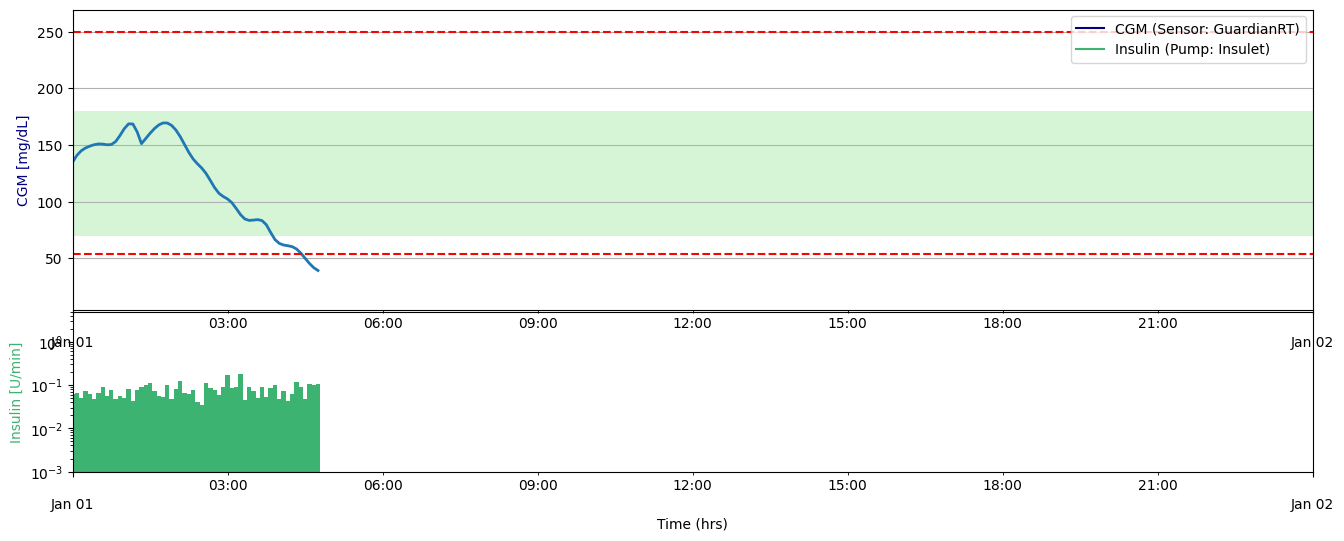

/testing/worker_episode_5001.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
65       2.0   0.0  118.933150   0.0  0.073957   0.998930     0.0 -0.060509   
66       2.0   1.0  116.080430   0.0  0.076573   0.999662     0.0 -0.060541   
67       2.0   2.0  119.653860   0.0  0.054206   0.998684     0.0 -0.061939   
68       2.0   3.0  126.930480   0.0  0.044250   0.994941     0.0 -0.063019   
69       2.0   4.0  134.317580   0.0  0.052258   0.989068     0.0 -0.064024   
..       ...   ...         ...   ...       ...        ...     ...       ...   
125      2.0  60.0   55.043186   0.0  0.064578   0.824727     0.0 -0.062289   
126      2.0  61.0   52.859170   0.0  0.131193   0.804472     0.0 -0.062138   
127      2.0  62.0   47.576070   0.0  0.119588   0.746702     0.0 -0.061981   
128      2.0  63.0   41.526234   0.0  0.076732   0.661279     0.0 -0.061823   
129      2.0  64.0   39.000000   0.0  0.064772 -15.000000     0.0 -0.061666   

        sigma  pro

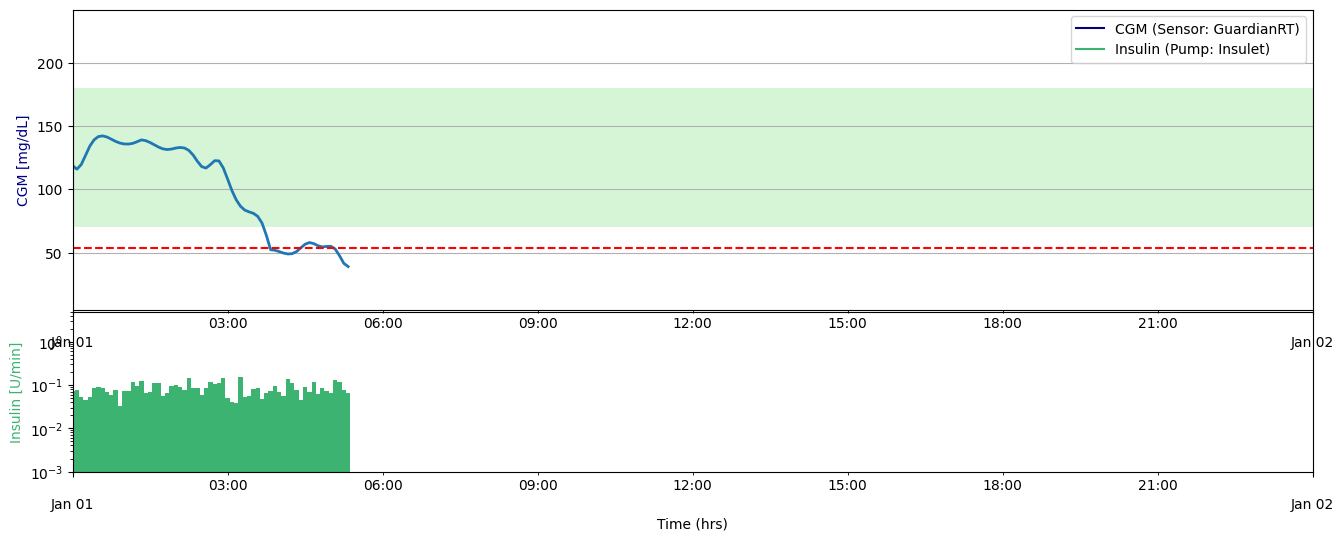

/testing/worker_episode_5002.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
65       2.0   0.0  131.213990   0.0  0.072201   0.991767     0.0 -0.060151   
66       2.0   1.0  132.697780   0.0  0.050898   0.990516     0.0 -0.060538   
67       2.0   2.0  131.666430   0.0  0.058564   0.991393     0.0 -0.062190   
68       2.0   3.0  130.220890   0.0  0.064426   0.992561     0.0 -0.063310   
69       2.0   4.0  130.868380   0.0  0.085950   0.992047     0.0 -0.064223   
..       ...   ...         ...   ...       ...        ...     ...       ...   
131      2.0  66.0   47.493507   0.0  0.088644   0.745688     0.0 -0.061576   
132      2.0  67.0   47.295040   0.0  0.073299   0.743234     0.0 -0.061579   
133      2.0  68.0   44.238552   0.0  0.042967   0.702528     0.0 -0.061584   
134      2.0  69.0   40.233970   0.0  0.127279   0.639689     0.0 -0.061556   
135      2.0  70.0   39.000000   0.0  0.116211 -15.000000     0.0 -0.061462   

        sigma  pro

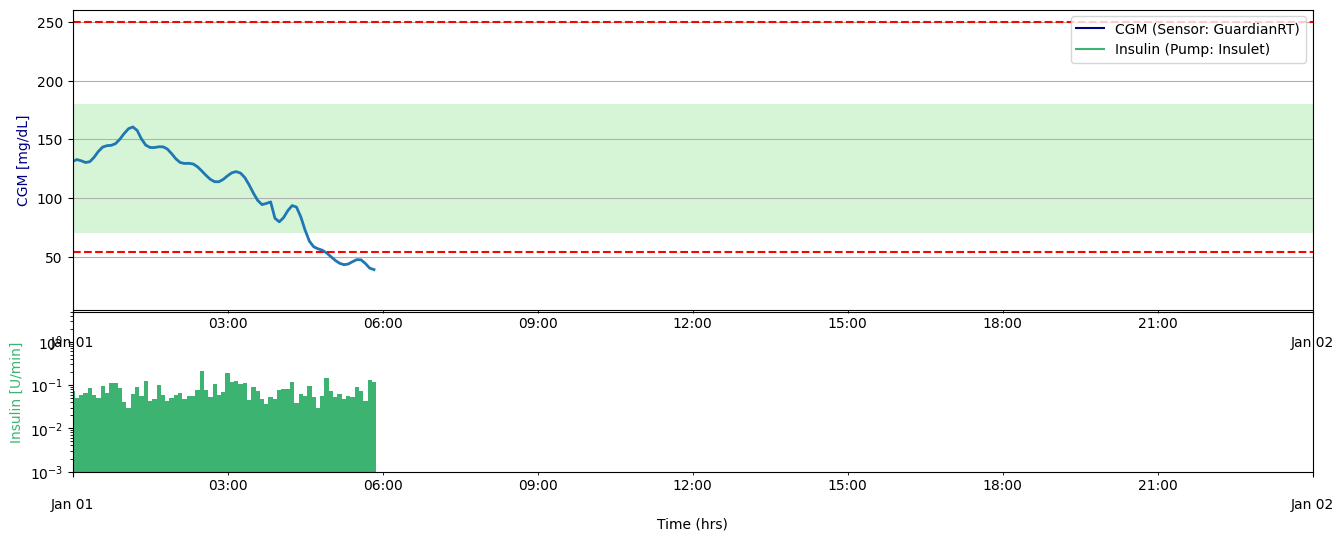

/testing/worker_episode_5003.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
59       2.0   0.0  131.176000   0.0  0.052003   0.991798     0.0 -0.060186   
60       2.0   1.0  133.899400   0.0  0.042586   0.989450     0.0 -0.060553   
61       2.0   2.0  137.168900   0.0  0.053295   0.986315     0.0 -0.062218   
62       2.0   3.0  140.173220   0.0  0.047938   0.983152     0.0 -0.063404   
63       2.0   4.0  141.939390   0.0  0.041473   0.981174     0.0 -0.064417   
..       ...   ...         ...   ...       ...        ...     ...       ...   
122      2.0  63.0   48.888393   0.0  0.057809   0.762332     0.0 -0.061832   
123      2.0  64.0   48.068130   0.0  0.100223   0.752670     0.0 -0.061760   
124      2.0  65.0   45.603504   0.0  0.066174   0.721407     0.0 -0.061690   
125      2.0  66.0   41.896088   0.0  0.049515   0.667218     0.0 -0.061630   
126      2.0  67.0   39.000000   0.0  0.086313 -15.000000     0.0 -0.061552   

        sigma  pro

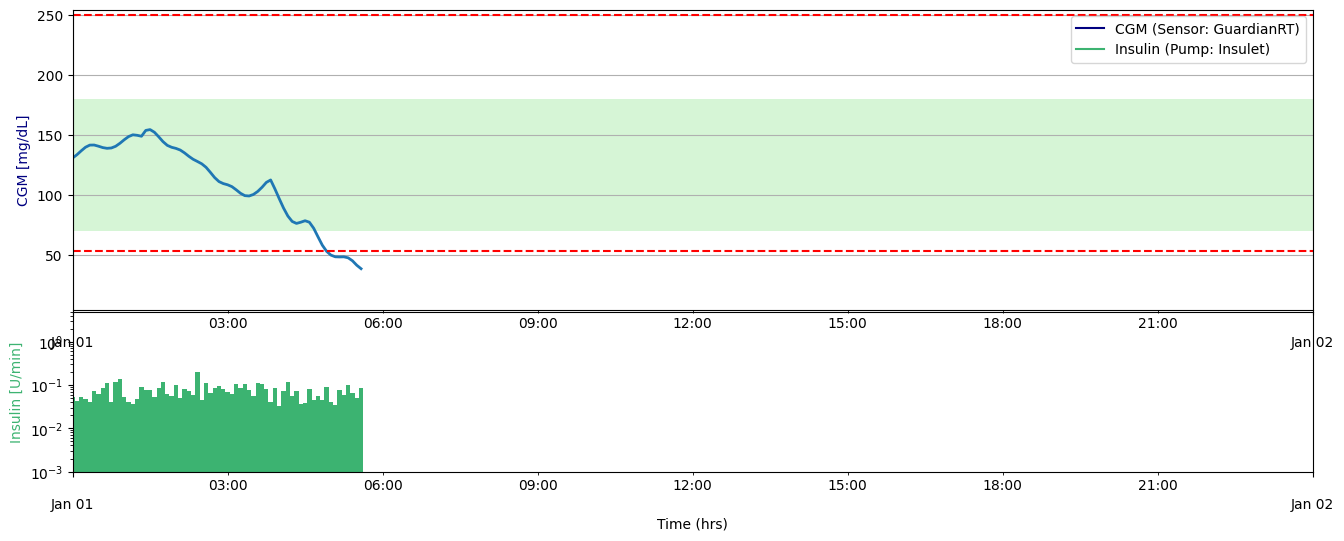

/testing/worker_episode_5004.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
66       2.0   0.0  119.637190   0.0  0.047638   0.998691     0.0 -0.060151   
67       2.0   1.0  122.467570   0.0  0.062271   0.997501     0.0 -0.060351   
68       2.0   2.0  128.168400   0.0  0.058709   0.994093     0.0 -0.061952   
69       2.0   3.0  134.837750   0.0  0.104366   0.988584     0.0 -0.063139   
70       2.0   4.0  140.305770   0.0  0.042633   0.983007     0.0 -0.064192   
..       ...   ...         ...   ...       ...        ...     ...       ...   
138      2.0  72.0   47.935486   0.0  0.067182   0.751074     0.0 -0.061580   
139      2.0  73.0   46.951004   0.0  0.095853   0.738929     0.0 -0.061445   
140      2.0  74.0   44.256767   0.0  0.126264   0.702788     0.0 -0.061327   
141      2.0  75.0   40.457073   0.0  0.090787   0.643513     0.0 -0.061207   
142      2.0  76.0   39.000000   0.0  0.052926 -15.000000     0.0 -0.061101   

        sigma  pro

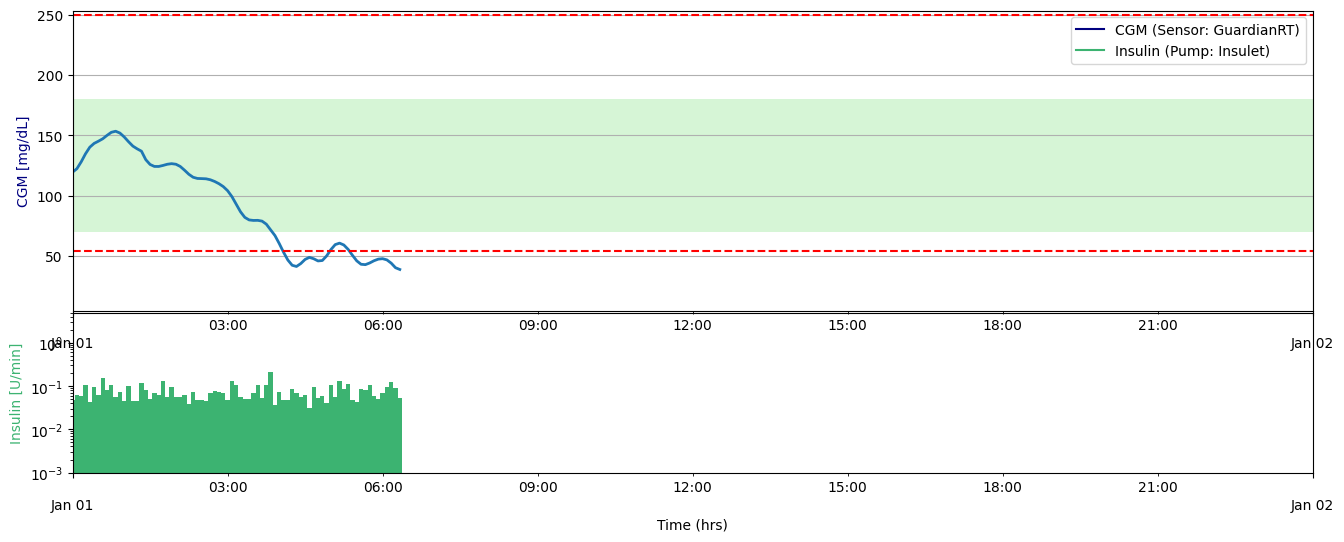

/testing/worker_episode_5005.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
58       2.0   0.0  130.325010   0.0  0.095189   0.992480     0.0 -0.060043   
59       2.0   1.0  136.213120   0.0  0.105596   0.987266     0.0 -0.060481   
60       2.0   2.0  138.599760   0.0  0.061447   0.984841     0.0 -0.062205   
61       2.0   3.0  138.012050   0.0  0.098428   0.985454     0.0 -0.063415   
62       2.0   4.0  135.618470   0.0  0.077104   0.987843     0.0 -0.064394   
..       ...   ...         ...   ...       ...        ...     ...       ...   
120      2.0  62.0   46.180550   0.0  0.042282   0.729041     0.0 -0.061710   
121      2.0  63.0   47.405884   0.0  0.047012   0.744607     0.0 -0.061679   
122      2.0  64.0   46.351772   0.0  0.045201   0.731269     0.0 -0.061660   
123      2.0  65.0   42.725140   0.0  0.052659   0.680159     0.0 -0.061627   
124      2.0  66.0   39.000000   0.0  0.053364 -15.000000     0.0 -0.061556   

        sigma  pro

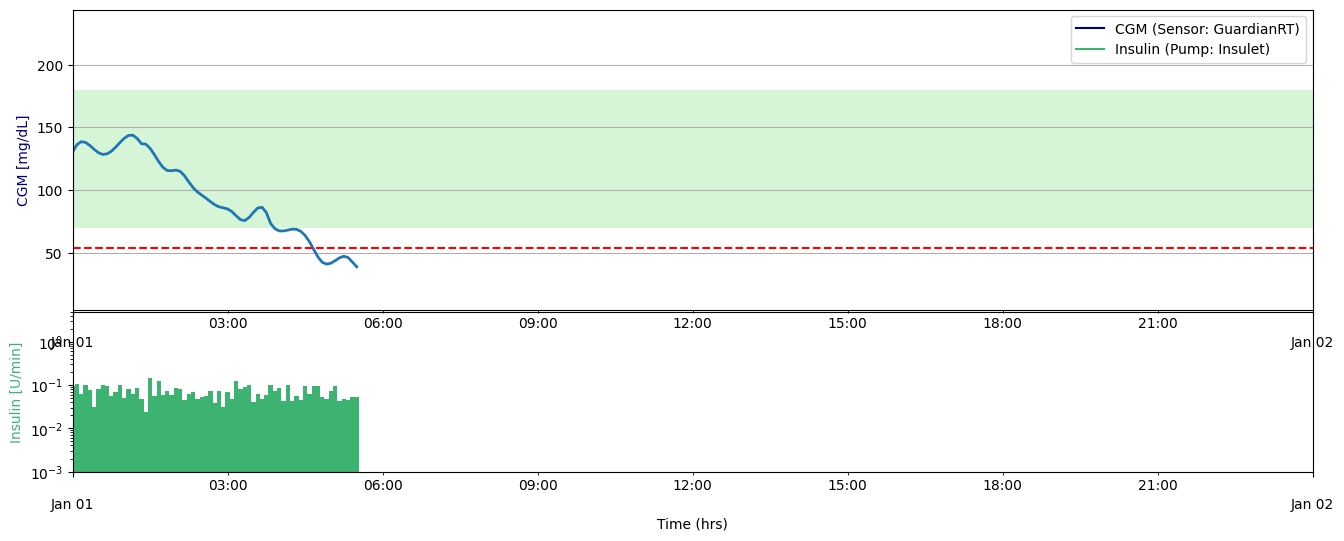

/testing/worker_episode_5006.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
60       2.0   0.0  131.176000   0.0  0.033224   0.991798     0.0 -0.060186   
61       2.0   1.0  133.899410   0.0  0.086807   0.989450     0.0 -0.060553   
62       2.0   2.0  137.169080   0.0  0.044540   0.986315     0.0 -0.062216   
63       2.0   3.0  140.173870   0.0  0.103895   0.983151     0.0 -0.063403   
64       2.0   4.0  141.940500   0.0  0.046997   0.981172     0.0 -0.064416   
..       ...   ...         ...   ...       ...        ...     ...       ...   
122      2.0  62.0   43.596493   0.0  0.045460   0.693230     0.0 -0.061815   
123      2.0  63.0   43.790990   0.0  0.045472   0.696076     0.0 -0.061699   
124      2.0  64.0   43.063766   0.0  0.101167   0.685302     0.0 -0.061626   
125      2.0  65.0   40.931786   0.0  0.041164   0.651513     0.0 -0.061552   
126      2.0  66.0   39.000000   0.0  0.094537 -15.000000     0.0 -0.061503   

        sigma  pro

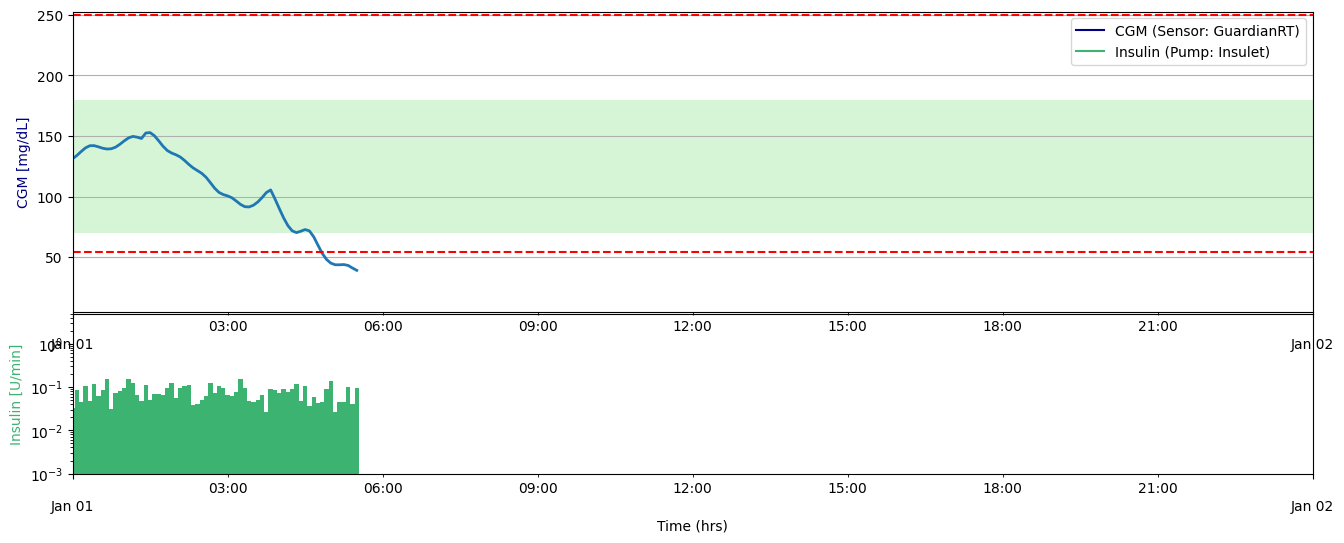

/testing/worker_episode_5007.csv
    episode     t         cgm  meal       ins        rew  rl_ins        mu  \
62      2.0   0.0  129.850310   0.0  0.110698   0.992849     0.0 -0.059792   
63      2.0   1.0  137.887940   0.0  0.059454   0.985582     0.0 -0.060331   
64      2.0   2.0  138.963300   0.0  0.106647   0.984457     0.0 -0.062152   
65      2.0   3.0  135.060790   0.0  0.068951   0.988375     0.0 -0.063385   
66      2.0   4.0  129.261810   0.0  0.140807   0.993296     0.0 -0.064331   
67      2.0   5.0  124.158875   0.0  0.109823   0.996626     0.0 -0.064896   
68      2.0   6.0  121.310135   0.0  0.080805   0.998030     0.0 -0.065362   
69      2.0   7.0  121.901150   0.0  0.063272   0.997767     0.0 -0.065673   
70      2.0   8.0  126.106940   0.0  0.112166   0.995473     0.0 -0.065899   
71      2.0   9.0  131.961000   0.0  0.078965   0.991146     0.0 -0.066121   
72      2.0  10.0  137.099670   0.0  0.143816   0.986385     0.0 -0.066317   
73      2.0  11.0  140.008390  

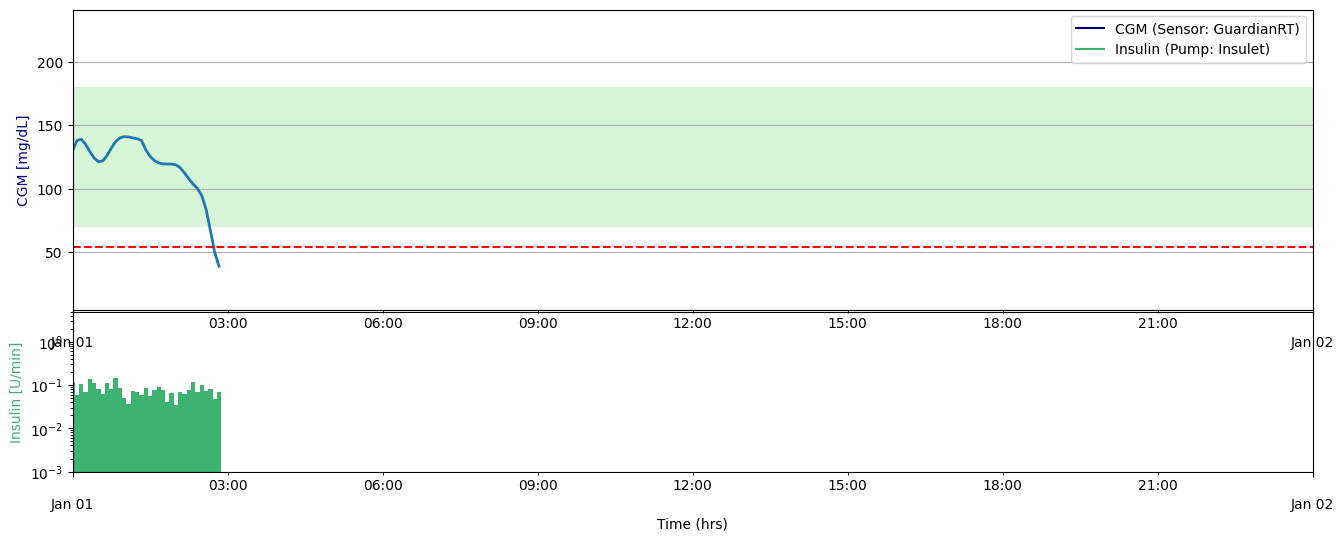

/testing/worker_episode_5008.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
72       2.0   0.0  116.651085   0.0  0.063588   0.999547     0.0 -0.060116   
73       2.0   1.0  114.031136   0.0  0.036988   0.999938     0.0 -0.060293   
74       2.0   2.0  112.632180   0.0  0.104113   1.000000     0.0 -0.061797   
75       2.0   3.0  112.797750   0.0  0.070062   0.999998     0.0 -0.062834   
76       2.0   4.0  114.814180   0.0  0.043470   0.999858     0.0 -0.063710   
..       ...   ...         ...   ...       ...        ...     ...       ...   
135      2.0  63.0   48.453075   0.0  0.099085   0.757248     0.0 -0.061874   
136      2.0  64.0   46.779324   0.0  0.083160   0.736755     0.0 -0.061763   
137      2.0  65.0   44.586727   0.0  0.049546   0.707457     0.0 -0.061685   
138      2.0  66.0   42.103990   0.0  0.039783   0.670511     0.0 -0.061621   
139      2.0  67.0   39.889656   0.0  0.074702 -15.000000     0.0 -0.061551   

        sigma  pro

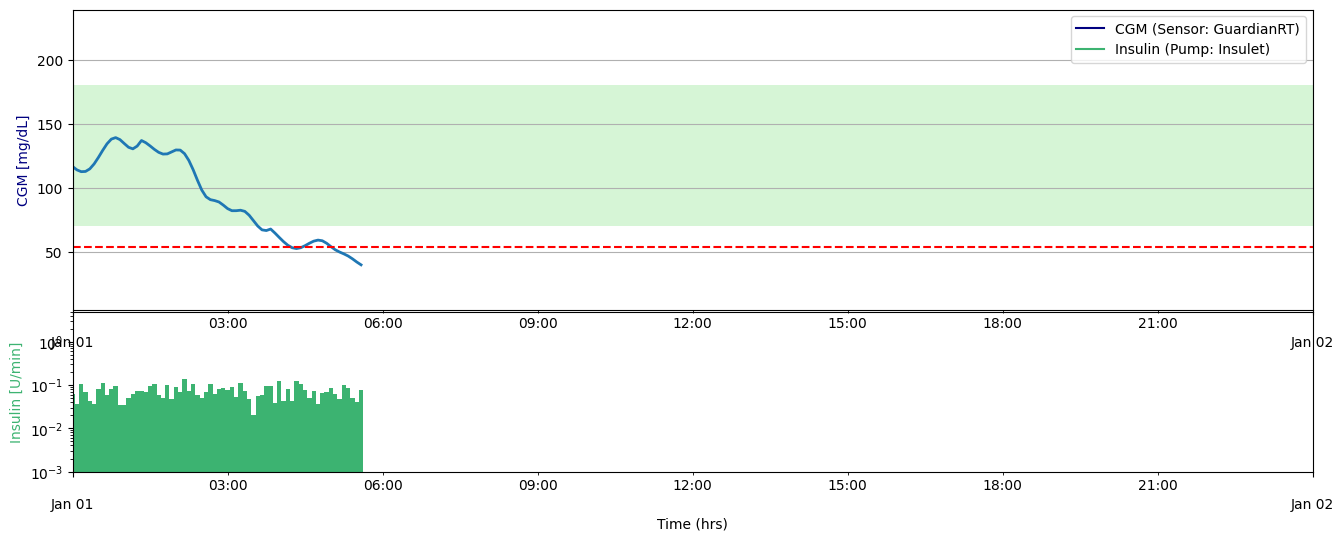

/testing/worker_episode_5009.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
57       2.0   0.0  118.933150   0.0  0.067179   0.998930     0.0 -0.060509   
58       2.0   1.0  116.080440   0.0  0.055941   0.999662     0.0 -0.060536   
59       2.0   2.0  119.653960   0.0  0.072884   0.998684     0.0 -0.061940   
60       2.0   3.0  126.931114   0.0  0.060998   0.994941     0.0 -0.063018   
61       2.0   4.0  134.319960   0.0  0.075033   0.989065     0.0 -0.064021   
..       ...   ...         ...   ...       ...        ...     ...       ...   
118      2.0  61.0   57.971660   0.0  0.106087   0.849066     0.0 -0.062272   
119      2.0  62.0   52.927600   0.0  0.026770   0.805136     0.0 -0.062119   
120      2.0  63.0   46.477123   0.0  0.085437   0.732888     0.0 -0.061987   
121      2.0  64.0   41.068720   0.0  0.177728   0.653788     0.0 -0.061800   
122      2.0  65.0   39.000000   0.0  0.118985 -15.000000     0.0 -0.061602   

        sigma  pro

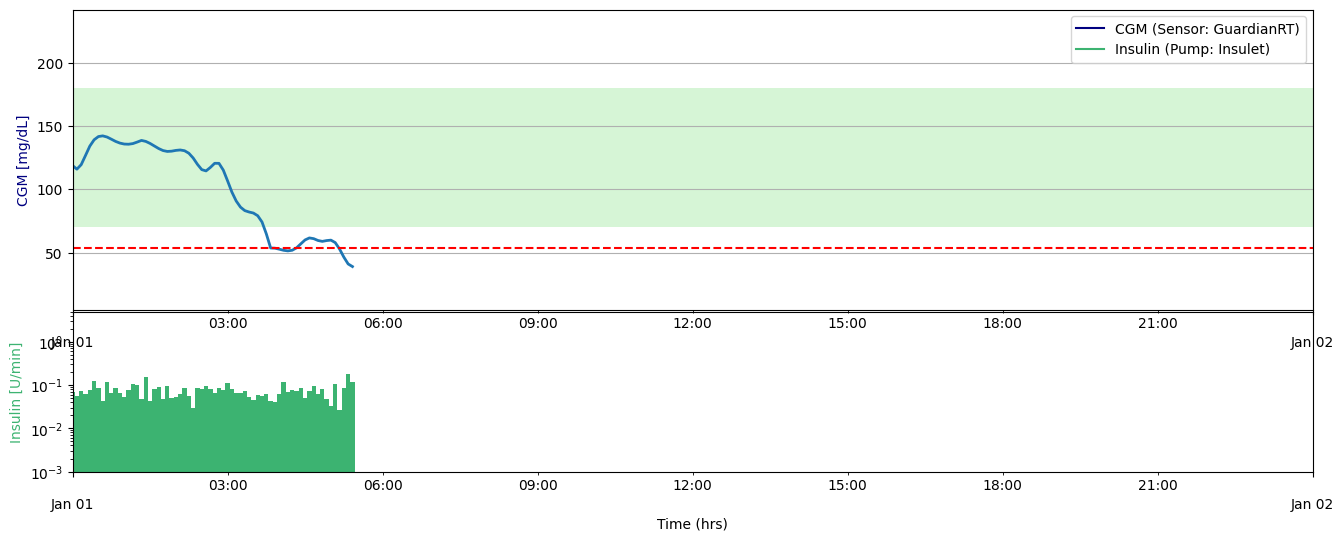

/testing/worker_episode_5010.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
59       2.0   0.0  122.709620   0.0  0.059503   0.997383     0.0 -0.060331   
60       2.0   1.0  120.061080   0.0  0.076152   0.998535     0.0 -0.060494   
61       2.0   2.0  119.629875   0.0  0.084170   0.998693     0.0 -0.061984   
62       2.0   3.0  122.026530   0.0  0.045667   0.997710     0.0 -0.063035   
63       2.0   4.0  127.666260   0.0  0.180471   0.994444     0.0 -0.063961   
..       ...   ...         ...   ...       ...        ...     ...       ...   
123      2.0  64.0   55.744450   0.0  0.092917   0.830837     0.0 -0.061869   
124      2.0  65.0   52.451134   0.0  0.074807   0.800471     0.0 -0.061849   
125      2.0  66.0   46.893870   0.0  0.072363   0.738207     0.0 -0.061799   
126      2.0  67.0   41.800865   0.0  0.056321   0.665699     0.0 -0.061699   
127      2.0  68.0   39.236813   0.0  0.051091 -15.000000     0.0 -0.061585   

        sigma  pro

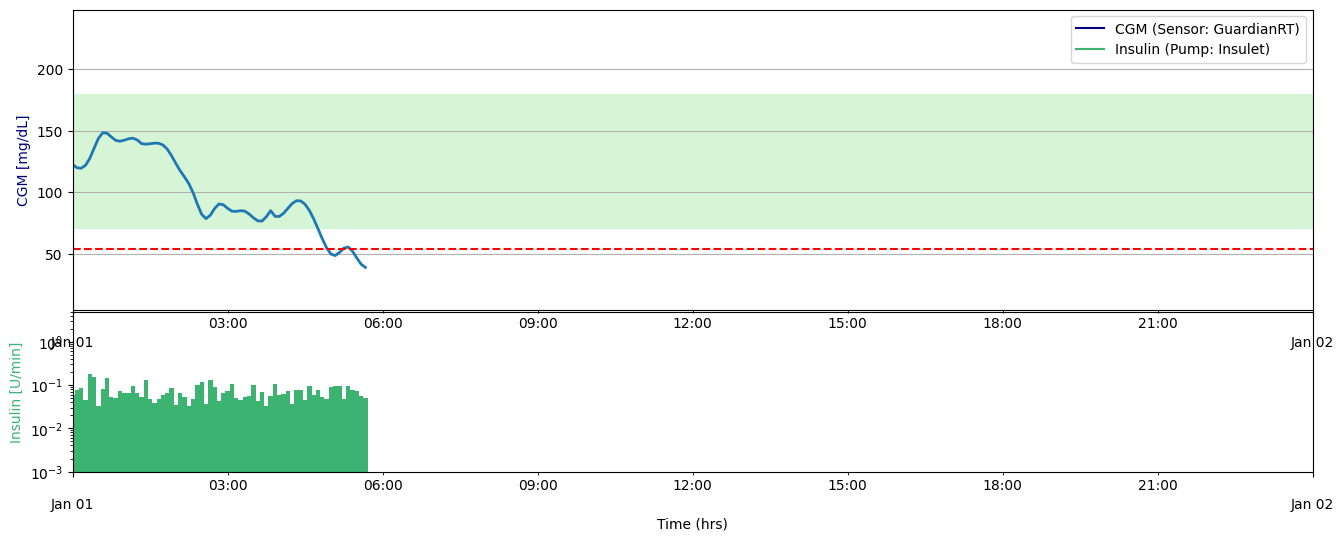

/testing/worker_episode_5011.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
61       2.0   0.0  123.561130   0.0  0.079970   0.996949     0.0 -0.060083   
62       2.0   1.0  127.341540   0.0  0.054977   0.994666     0.0 -0.060391   
63       2.0   2.0  129.592580   0.0  0.098202   0.993046     0.0 -0.062034   
64       2.0   3.0  130.883150   0.0  0.069211   0.992035     0.0 -0.063197   
65       2.0   4.0  132.264470   0.0  0.080055   0.990889     0.0 -0.064171   
..       ...   ...         ...   ...       ...        ...     ...       ...   
134      2.0  73.0   60.833397   0.0  0.084745   0.870081     0.0 -0.061935   
135      2.0  74.0   55.476498   0.0  0.070745   0.828524     0.0 -0.061767   
136      2.0  75.0   50.990314   0.0  0.086188   0.785550     0.0 -0.061600   
137      2.0  76.0   46.811913   0.0  0.058505   0.737169     0.0 -0.061440   
138      2.0  77.0   39.000000   0.0  0.077879 -15.000000     0.0 -0.061305   

        sigma  pro

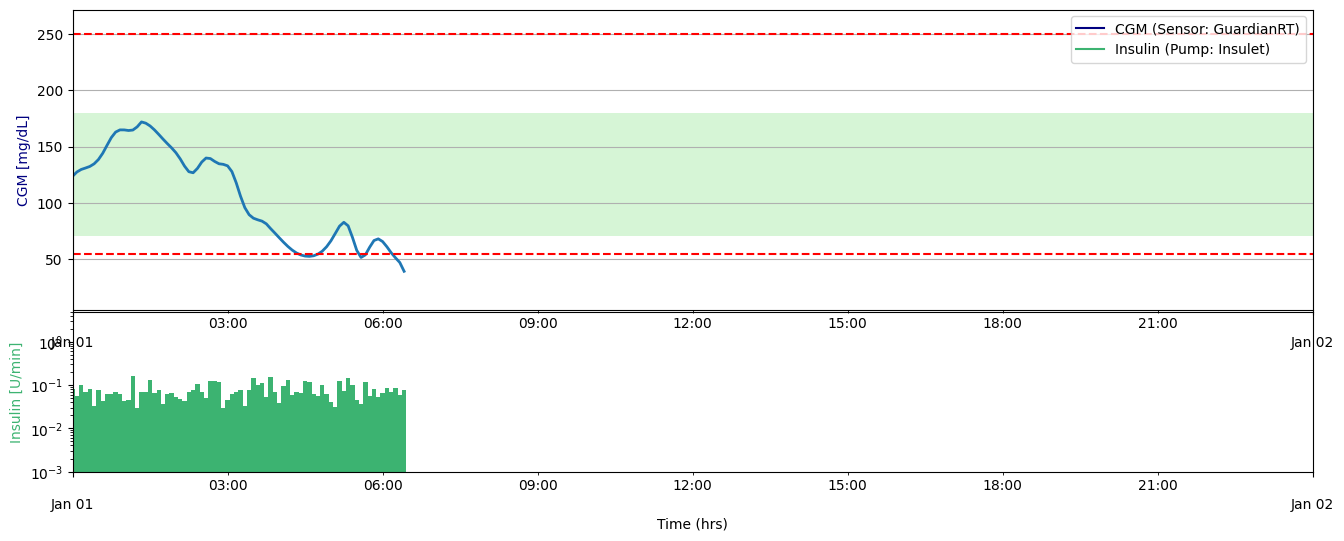

/testing/worker_episode_5012.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
59       2.0   0.0  131.176000   0.0  0.070090   0.991798     0.0 -0.060186   
60       2.0   1.0  133.899370   0.0  0.129570   0.989450     0.0 -0.060553   
61       2.0   2.0  137.168600   0.0  0.101912   0.986316     0.0 -0.062214   
62       2.0   3.0  140.171020   0.0  0.050615   0.983155     0.0 -0.063399   
63       2.0   4.0  141.929760   0.0  0.070023   0.981185     0.0 -0.064424   
..       ...   ...         ...   ...       ...        ...     ...       ...   
122      2.0  63.0   47.114390   0.0  0.073061   0.740982     0.0 -0.061782   
123      2.0  64.0   46.260586   0.0  0.058834   0.730085     0.0 -0.061716   
124      2.0  65.0   43.739902   0.0  0.045772   0.695331     0.0 -0.061662   
125      2.0  66.0   40.357563   0.0  0.052149   0.641813     0.0 -0.061597   
126      2.0  67.0   39.000000   0.0  0.036371 -15.000000     0.0 -0.061511   

        sigma  pro

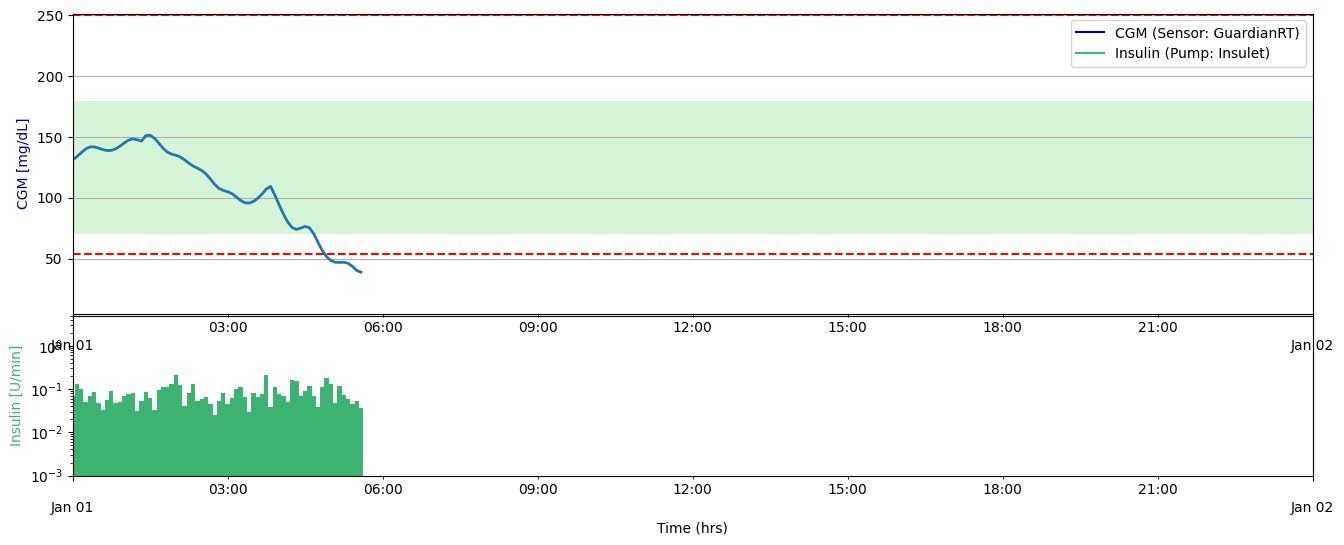

/testing/worker_episode_5013.csv
    episode     t         cgm  meal       ins        rew  rl_ins        mu  \
62      2.0   0.0  129.850330   0.0  0.080917   0.992849     0.0 -0.059792   
63      2.0   1.0  137.887970   0.0  0.102449   0.985582     0.0 -0.060319   
64      2.0   2.0  138.963600   0.0  0.154280   0.984457     0.0 -0.062150   
65      2.0   3.0  135.062060   0.0  0.094380   0.988373     0.0 -0.063379   
66      2.0   4.0  129.264570   0.0  0.189117   0.993294     0.0 -0.064330   
67      2.0   5.0  124.161600   0.0  0.042918   0.996624     0.0 -0.064893   
68      2.0   6.0  121.306960   0.0  0.045021   0.998031     0.0 -0.065383   
69      2.0   7.0  121.880295   0.0  0.078839   0.997777     0.0 -0.065690   
70      2.0   8.0  126.051200   0.0  0.037839   0.995508     0.0 -0.065896   
71      2.0   9.0  131.850230   0.0  0.050323   0.991240     0.0 -0.066098   
72      2.0  10.0  136.913760   0.0  0.027536   0.986572     0.0 -0.066291   
73      2.0  11.0  139.730680  

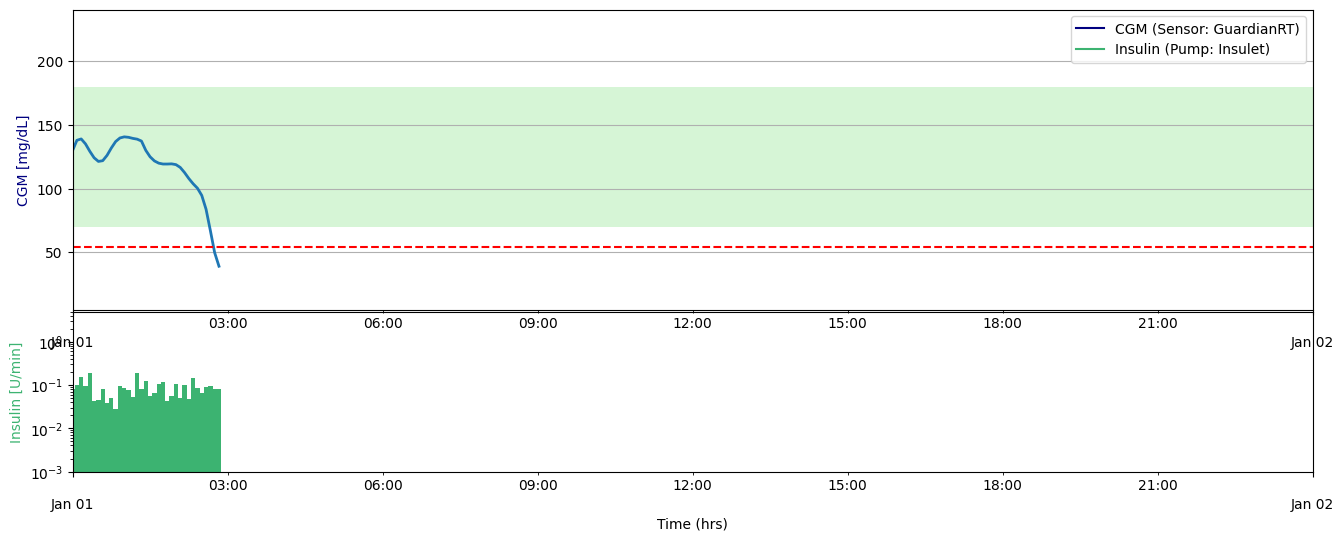

/testing/worker_episode_5014.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
58       2.0   0.0  119.637190   0.0  0.048823   0.998691     0.0 -0.060151   
59       2.0   1.0  122.467560   0.0  0.089619   0.997501     0.0 -0.060351   
60       2.0   2.0  128.168350   0.0  0.081550   0.994093     0.0 -0.061950   
61       2.0   3.0  134.837330   0.0  0.056841   0.988585     0.0 -0.063136   
62       2.0   4.0  140.303620   0.0  0.104951   0.983009     0.0 -0.064197   
63       2.0   5.0  143.424850   0.0  0.082949   0.979444     0.0 -0.064984   
64       2.0   6.0  145.247730   0.0  0.047975   0.977245     0.0 -0.065635   
65       2.0   7.0  147.230270   0.0  0.040614   0.974758     0.0 -0.066110   
66       2.0   8.0  150.017070   0.0  0.054998   0.971106     0.0 -0.066439   
67       2.0   9.0  152.528750   0.0  0.061266   0.967664     0.0 -0.066695   
68       2.0  10.0  153.365050   0.0  0.042530   0.966488     0.0 -0.066878   
69       2.0  11.0 

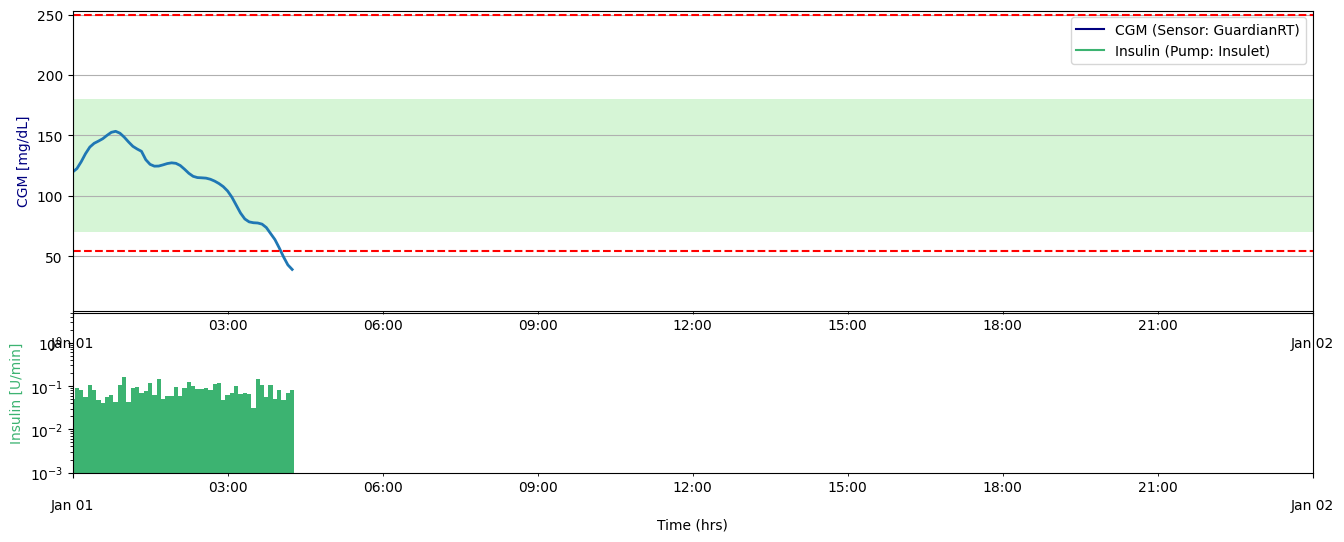

/testing/worker_episode_5015.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
60       2.0   0.0  129.971680   0.0  0.102802   0.992755     0.0 -0.060094   
61       2.0   1.0  134.092930   0.0  0.062250   0.989274     0.0 -0.060511   
62       2.0   2.0  134.954440   0.0  0.169702   0.988475     0.0 -0.062187   
63       2.0   3.0  134.064200   0.0  0.137174   0.989300     0.0 -0.063348   
64       2.0   4.0  133.589250   0.0  0.091944   0.989729     0.0 -0.064301   
65       2.0   5.0  134.978120   0.0  0.060722   0.988452     0.0 -0.064951   
66       2.0   6.0  138.159150   0.0  0.039658   0.985302     0.0 -0.065538   
67       2.0   7.0  142.657820   0.0  0.093186   0.980345     0.0 -0.065977   
68       2.0   8.0  147.664870   0.0  0.085579   0.974200     0.0 -0.066322   
69       2.0   9.0  151.665200   0.0  0.117608   0.968863     0.0 -0.066614   
70       2.0  10.0  153.086010   0.0  0.096400   0.966882     0.0 -0.066841   
71       2.0  11.0 

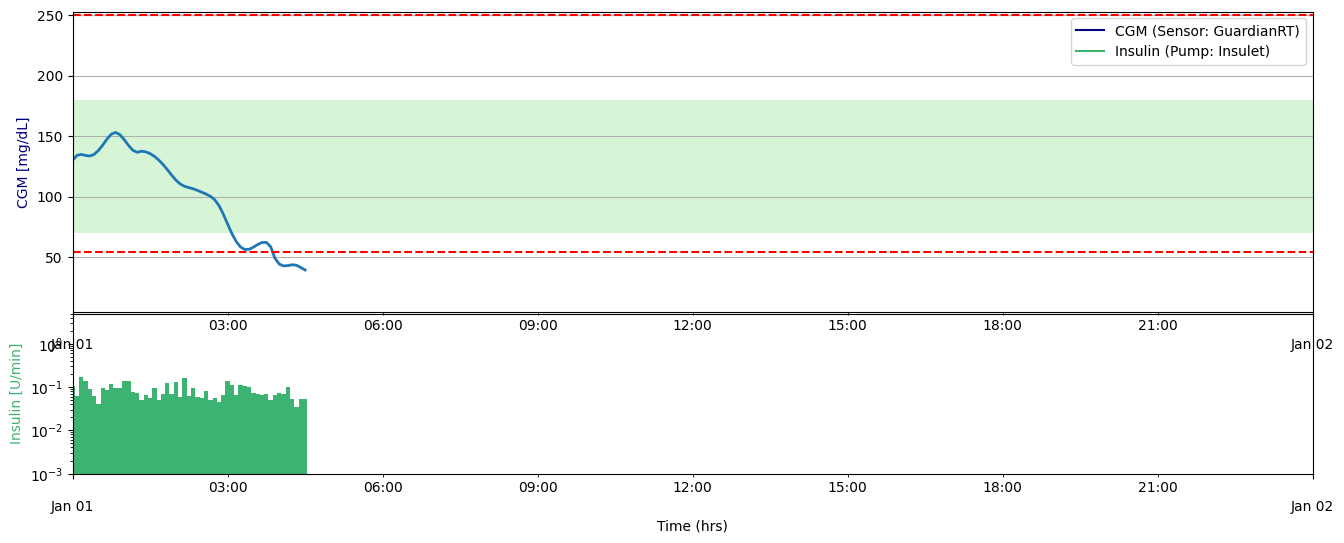

/testing/worker_episode_5016.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
64       2.0   0.0  121.227066   0.0  0.056958   0.998066     0.0 -0.060032   
65       2.0   1.0  123.525320   0.0  0.104482   0.996968     0.0 -0.060311   
66       2.0   2.0  125.530470   0.0  0.134992   0.995830     0.0 -0.061943   
67       2.0   3.0  127.612274   0.0  0.083776   0.994481     0.0 -0.063089   
68       2.0   4.0  130.341050   0.0  0.135674   0.992467     0.0 -0.064067   
..       ...   ...         ...   ...       ...        ...     ...       ...   
120      2.0  56.0   56.309364   0.0  0.073196   0.835626     0.0 -0.062500   
121      2.0  57.0   49.764095   0.0  0.096075   0.772267     0.0 -0.062412   
122      2.0  58.0   44.018524   0.0  0.090080   0.699373     0.0 -0.062278   
123      2.0  59.0   40.467735   0.0  0.059830   0.643695     0.0 -0.062139   
124      2.0  60.0   39.000000   0.0  0.099338 -15.000000     0.0 -0.062030   

        sigma  pro

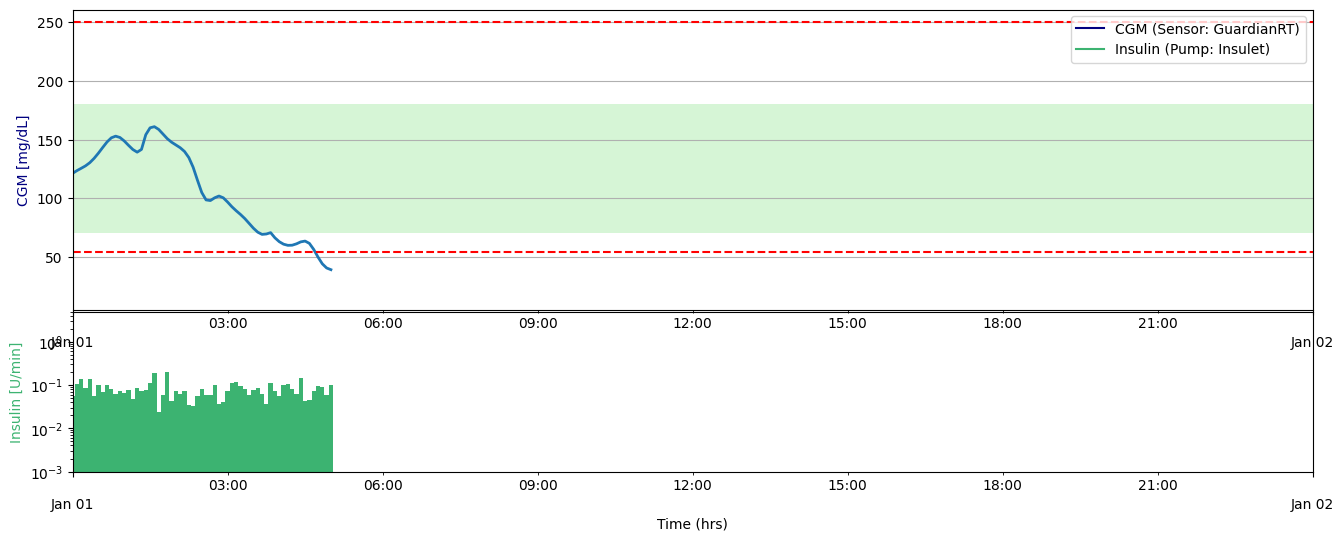

/testing/worker_episode_5017.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
49       2.0   0.0  130.325010   0.0  0.072779   0.992480     0.0 -0.060043   
50       2.0   1.0  136.213130   0.0  0.114037   0.987266     0.0 -0.060466   
51       2.0   2.0  138.600000   0.0  0.084194   0.984841     0.0 -0.062204   
52       2.0   3.0  138.013290   0.0  0.092464   0.985453     0.0 -0.063412   
53       2.0   4.0  135.622200   0.0  0.039224   0.987840     0.0 -0.064393   
54       2.0   5.0  132.551680   0.0  0.062119   0.990643     0.0 -0.065030   
55       2.0   6.0  129.838300   0.0  0.044255   0.992858     0.0 -0.065535   
56       2.0   7.0  128.446600   0.0  0.062132   0.993894     0.0 -0.065869   
57       2.0   8.0  128.941740   0.0  0.048049   0.993534     0.0 -0.066067   
58       2.0   9.0  131.042560   0.0  0.065900   0.991906     0.0 -0.066224   
59       2.0  10.0  134.257610   0.0  0.087143   0.989123     0.0 -0.066352   
60       2.0  11.0 

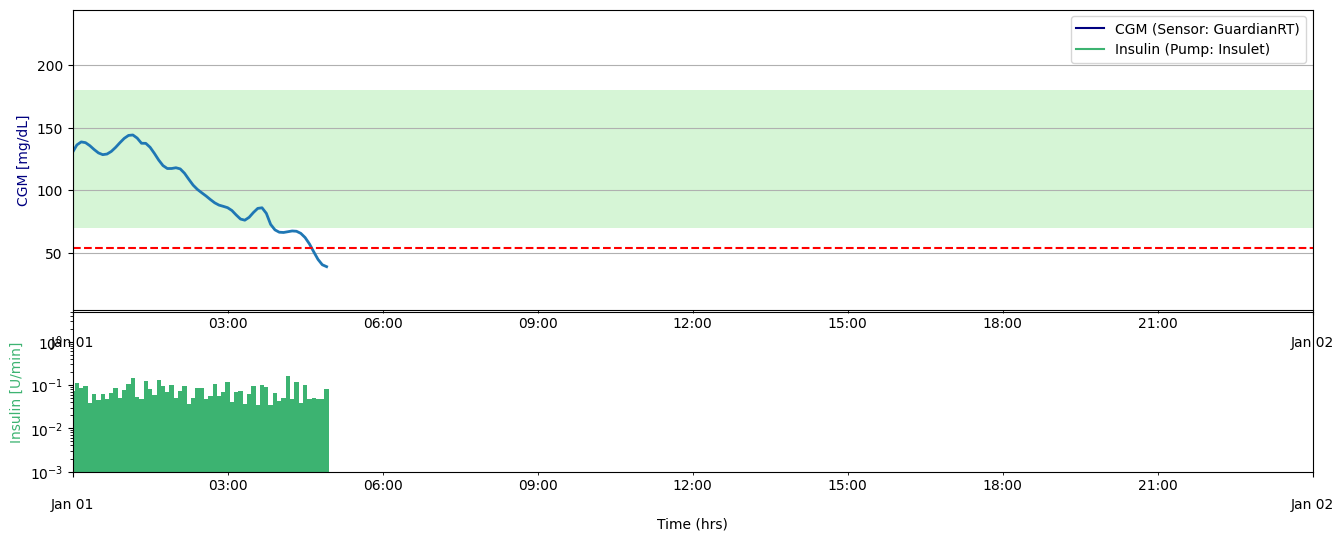

/testing/worker_episode_5018.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
58       2.0   0.0  119.073470   0.0  0.059605   0.998884     0.0 -0.060132   
59       2.0   1.0  115.664820   0.0  0.097428   0.999735     0.0 -0.060339   
60       2.0   2.0  117.648480   0.0  0.068967   0.999308     0.0 -0.061842   
61       2.0   3.0  123.405136   0.0  0.042637   0.997031     0.0 -0.062932   
62       2.0   4.0  130.316000   0.0  0.066786   0.992487     0.0 -0.063923   
..       ...   ...         ...   ...       ...        ...     ...       ...   
118      2.0  60.0   62.533634   0.0  0.074969   0.881403     0.0 -0.062529   
119      2.0  61.0   55.365772   0.0  0.095941   0.827560     0.0 -0.062356   
120      2.0  62.0   46.968204   0.0  0.080396   0.739146     0.0 -0.062139   
121      2.0  63.0   40.056736   0.0  0.067330   0.636623     0.0 -0.061908   
122      2.0  64.0   39.000000   0.0  0.119464 -15.000000     0.0 -0.061691   

        sigma  pro

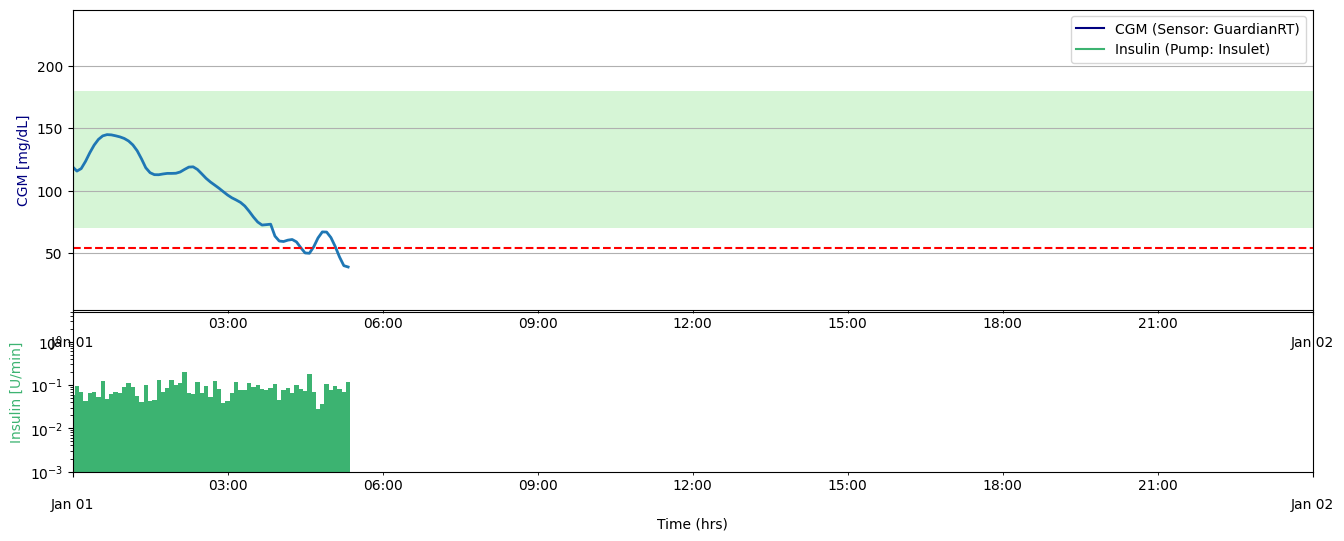

/testing/worker_episode_5019.csv
     episode     t         cgm  meal       ins        rew  rl_ins        mu  \
67       2.0   0.0  133.854480   0.0  0.044829   0.989490     0.0 -0.060199   
68       2.0   1.0  140.521400   0.0  0.058390   0.982769     0.0 -0.060595   
69       2.0   2.0  143.686950   0.0  0.075894   0.979133     0.0 -0.062337   
70       2.0   3.0  144.112240   0.0  0.044228   0.978625     0.0 -0.063554   
71       2.0   4.0  143.280940   0.0  0.077145   0.979615     0.0 -0.064557   
72       2.0   5.0  142.282230   0.0  0.093001   0.980780     0.0 -0.065220   
73       2.0   6.0  141.369670   0.0  0.060335   0.981821     0.0 -0.065735   
74       2.0   7.0  140.611340   0.0  0.055691   0.982669     0.0 -0.066116   
75       2.0   8.0  140.177260   0.0  0.129507   0.983148     0.0 -0.066368   
76       2.0   9.0  140.457950   0.0  0.075808   0.982839     0.0 -0.066554   
77       2.0  10.0  141.837430   0.0  0.073987   0.981290     0.0 -0.066659   
78       2.0  11.0 

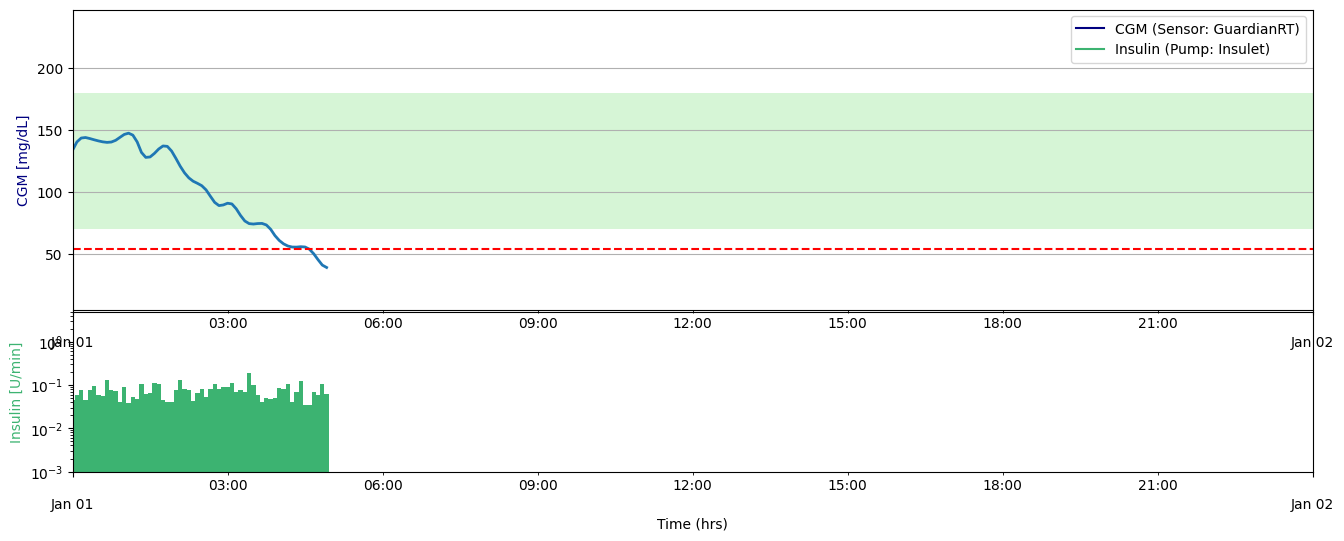

FileNotFoundError: [Errno 2] No such file or directory: '../../results/offline_td3_clinical/training/worker_episode_0.csv'

In [3]:

## debugging a given experiment
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi
# plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

real
690
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   71.053131   2.187724  24.952614   0.332676   1.473854   2.864151   
std    12.890716   3.592842  10.296977   1.084217   5.112085   3.235323   
min     8.860760   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  30.769230  71.551730  16.959064  80.590710  22.051207   

           hgbi         ri  
mean   7.620674  10.484825  
std    3.924464   6.169289  
min    1.789013   1.845144  
max   57.820187  76.844830  
quadratic
328
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   69.360132   1.064259  27.490189   0.161047   1.924372   1.790704   
std    12.350792   2.620374  10.311082   0.791841   5.182413   2.688906   
min     9.282701   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  22.115385  69.551285  14.705882  80.590710  22.915808   

           hgbi         ri  
mean   8.071870   9.862574  
std    3.850129   5.74

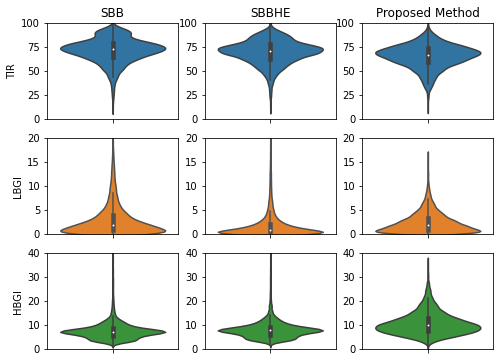

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()